# <span style="color:firebrick"> Esercitazione 4 </span>  

La materia esiste in stati macroscopici che sono stabili e variano nel tempo. Anche se questi stati macroscopici contengono moltissimi gradi di libertà ($10^{23}$ GDL) in moto caotico, lo stato termodinamico può essere specificato completamente da pochi parametri detti variabili di stato. L'obiettivo della meccanica statistica è quello di prevedere le proprietà macroscopiche di un sistema all'equilibrio a partire da una struttura microscopica. Dato un sistema a $N$ particelle in $d=3$ dimensioni, consideriamo uno spazio delle fasi $\Gamma$ costituito dalle coordinate $\{(q_i,p_i)\}_{i=1,\dots,3N}$ delle particelle per ogni dimensione spaziale. Le coordinate sono dipendenti dal tempo e il modo in cui variano nel tempo è determinato dalle equazioni del moto canoniche.

Un dato macrostato al tempo $t$ può trovarsi in un numero molto grande di diversi microstati. Per questo, in un singolo istante di tempo, ha senso considerare tutti i possibili microstati distinti caratterizzati dallo stesso macrostato. Sotto circostanze ordinarie, ci aspettiamo che il comportamento medio di un qualsiasi sistema in questa collezione (ensemble) sia identico al comportamento mediato nel tempo del sistema dato. Si lavora utilizzando l'**ipotesi ergodica** secondo cui, durante l'evoluzione del sistema nel tempo (nel limite di tempi lunghi) il sistema visita tutte le configurazioni compatibili con le sue condizioni macroscopiche, quindi la media temporale di un'osservabile lungo una singola traiettoria coincide con la media statistica sull'ensemble.

Ha senso introdurre una quantità, che è la densità di probabilità $\rho(q,p,t)$ che rappresenta la densità di probabilità che il sistema si trovi in quel particolare intorno di $(q,p)$ nello spazio delle fasi al tempo $t$. Un sistema all'equilibrio è descritto in modo adeguato da un **ensemble stazionario**, in cui le medie di insieme non sono una funzione esplicita del tempo.

Il teorema di Liouville afferma che la densità locale nello spazio delle fasi si conserva lungo le traiettorie dinamiche del sistema. Di conseguenza lo sciame dei punti rappresentativi si muove nello spazio delle fasi come un fluido incomprimibile si muove nello spazio fisico.

Esistono diversi tipi di ensemble, nell'**ensemble microcanonico** $\rho(q,p)=\text{cost}$ nelle regioni rilevanti dello spazio delle fasi e zero nelle altri. Per un fluido a $N$ particelle in un box di volume $V$ le costanti del moto rilevanti sono l'energia $E$, il momento totale $P$ e il momento angolare totale $L$ (per un sistema in un box fissato in un laboratorio $P=L=0$) e i microstati con uguale energia hanno la stessa probabilità.

### Dinamica Molecolare (MD) 
È lo studio delle simulazioni del comportamento nel tempo di un sistema di particelle. MD genera informazioni a livello microscopico su posizioni e velocità delle particelle. Per calcolare il comportamento microscopico di un sistema a partire dalle leggi della meccanica classica bisogna fornire come input un potenziale d'interazione.

### Algoritmo di Verlet
I criteri per scegliere un buon algoritmo che descriva l'evoluzione del sistema nel tempo in una simulazione di dinamica molecolare sono:
1. conservazione di energia e momento e reversibilità (i.e. quando $\delta t \to -\delta t$ il sistema torna allo stato originale).
2. computazionalmente efficiente
3. dà possibilità di realizzare step di integrazione ampi
4. dà la possibilità di stimare le forze agenti sulle particelle a ogni step

Secondo l'algoritmo di Verlet le posizioni al tempo $t+\delta t$ si aggiornano tramite:
$$\vec{r}(t+\delta t) \approx 2\vec{r}(t)-\vec{r}(t-\delta t)+\delta t^2 \vec{a}(t)$$
si tratta di un metodo a due step, di conseguenza posizioni e velocità al tempo zero non sono sufficienti per iniziare una simulazione. Inoltre $\vec{r}(t+\delta t)$ e $\vec{r}(t-\delta t)$ svolgono un ruolo simmetrico, rendendo l'algoritmo reversibile.


Nelle simulazioni di dinamica molecolare (MD), il tempo di calcolo necessario per valutare le forze o l’energia potenziale scala come 
$\propto N^2$, dove $N$ è il numero di particelle. Di conseguenza, simulazioni con un numero molto elevato di particelle risultano computazionalmente costose. Per questo motivo, il sistema fisico viene studiato mediante un box di simulazione contenente un numero limitato di particelle. Tuttavia, un sistema finito è soggetto a effetti di superficie indesiderati, dovuti alla presenza di particelle che interagiscono con le pareti del box.
Per ridurre tali effetti si adottano le condizioni periodiche al contorno (Periodic Boundary Conditions, PBC): il box di simulazione viene replicato infinitamente in tutte le direzioni, formando un reticolo periodico nello spazio. Quando una molecola si muove nel box centrale, che funge da riferimento, le sue immagini periodiche nei box adiacenti si muovono nello stesso modo, e quando una molecola esce da una faccia del box centrale, una sua immagine entra dalla faccia opposta.

Nel caso considerato si assume che l'interazione atomo-atomo sia descritta dal potenziale di Lennard-Jones:
$$ V(r)=4\varepsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right]$$
Inoltre è possibile introdurre un cutoff sferico $r_c$ per cui per due particelle a distanza $r>r_c$ il potenziale è nullo.

Temperatura e pressione si calcolano attraverso il teorema del viriale, per cui:
$$
\langle K\rangle=\frac{3}{2}N k_B T
\qquad
P=\rho k_B T-\frac{1}{3V}\left\langle \sum \sum_{i<j=1}^N |\vec{r}_{ij}|\,\frac{dv(r)}{dr}\Big|_{r=|\vec{r}_{ij}|} \right\rangle
$$


### <span style="color:firebrick"> Esercizio 4.1

<span style="color:red">In Statistical Mechanics the Maxwell–Boltzmann distribution (<a href="https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution" target="_blank">Link Wikipedia</a>) is a probability distribution used for describing particle speeds in idealized gases. However, rarefied gases at ordinary temperatures behave very nearly like an ideal gas and the Maxwell–Boltzmann speed distribution is an excellent approximation for such gases. For a 3D system its formula is:
$$p(v,T) = \left( \frac{m}{2\pi k_B T} \right)^{3/2} 4\pi v^2 e^{-\frac{m v^2}{2 k_B T}}$$

<span style="color:red">By using LJ reduced units (Lenght: $\sigma$; Energy: $\epsilon$; Mass: the mass, $m$, of the particles; Temperature: $\epsilon/k_B$; velocity: $\sqrt{\epsilon/m}$) its form becomes:
$$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$

<span style="color:red">The NSL_SIMULATOR code already computes the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$.

<span style="color:red">Include the calculation of the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, inside your Molecular Dynamics code by using data blocking to obtain single block averages, progressive average values and progressive uncertainties for $p(v^*,T^*)$.</span>

<span style="color:red">Remember that, the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, can be approximately computed as a **normalized histogram** on an appropriate interval $\left[ 0, v_{max}\right]$ and chosing the number of bins into which you want to divide this interval.

Il codice calcola la distribuzione del modulo delle velocità delle particelle utilizzando il data blocking per stimare la media e l’errore statistico.

Nella funzione `measure()` per ogni particella, si calcola il modulo della velocità e si aggiorna il conteggio dei bin corrispondenti alla distribuzione, normalizzando per il numero totale di particelle. Nella funzione `average()` si calcola la media dei valori di ciascun bin all’interno di ogni blocco, la media cumulativa e l’errore statistico e salva i risultati su file per ogni bin: indice del blocco, velocità, media del blocco, media cumulativa ed errore.
La distribuzione delle velocità teorica ha valore medio $\langle v\rangle =\sqrt{8T/\pi}\approx 1.6T$ e deviazione standard $\sigma_v=\sqrt{T}$. Si sceglie $v_{max}=4.0 \sqrt{T}$ che è cutoff ragionevole, in quanto corrisponde circa 3 sigma della Maxwell-Boltzmann.


###  <span style="color:firebrick"> Exercise 4.2

<span style="color:red">By means of your upgraded code, perform MD simulations via a Lennard-Jones model ( e.g. Argon parameters: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- <span style="color:red">gas phase: $\rho^\star = 0.05$, $T^\star \sim  2.0$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">starting from a **very low entropic** initial configuration:
1. <span style="color:red">initial **particle positions**: fcc crystal occupying half of the simulation box in each dimension
2. <span style="color:red">initial **velocity distribution**: $p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$ where $v_{T^*}$ is suitably connected to $T^*$. For example, this condition could be obtained by imposing that every particle has an initial velocity $\pm v_{T^*}$ for **only one** of its velocity components: $v_x$, $v_y$, $v_z$.

<span style="color:red">The goal is to show that, by evolving such initial condition via a Molecular Dynamics simulation, the velocity distribution tends to approximate the Maxwell–Boltzmann distribution.

- <span style="color:red"> **Produce some pictures that show this convergence**
- <span style="color:red"> The evolution of the system moves towards the increasing of entropy (more homeogeneous configuration of particles)? What would you find by changing the direction of time? Comment on these aspects in your jupyter-notebook

<span style="color:red"> **Note that** the MD simulation will conserve the total energy; thus the kinetic energy and the temperature are not constant of motion ... the comparison should be done with $p(v^*,T^*_{\rm eff})$ where $T^*_{\rm eff}$ is the effective temperature obtained once the system has been equilibrated.

1. Per prima cosa si seleziona il file `config.fcc`, che contiene le posizioni delle 108 particelle espresse in unità relative al lato del box (valori normalizzati tra 0 e 1). Durante l'inizializzazione, questi valori vengono moltiplicati per il lato del box `_side`. Per rispettare le specifiche della consegna, in questo caso si utilizza `_halfside` al posto di `_side`.  Si tratta di una configurazione molto ordinata, non tipica di un gas; di conseguenza ci aspettiamo una fase iniziale di equilibrazione, in cui le particelle, inizialmente molto vicine tra loro, si allontanano a causa del potenziale repulsivo prima di raggiungere una condizione stabile. Il sistema rilassa verso una configurazione più disordinata, corrispondente ad energia potenziale più alta, quindi a energia cinetica e temperatura più basse. Per questo motivo, dato che vogliamo equilibrare il sistema a $T=2$, partiamo da una temperatura più alta $T_{start}=2.73$.

2. Come noto, lo schema di integrazione di Verlet richiede sia le posizioni al tempo $t$, sia quelle al tempo $t-\delta t$. Se la simulazione parte da zero, è necessario assegnare velocità iniziali alle particelle, quindi si modifica anche la parte di codice relativa all’inizializzazione delle velocità.
- Se `_restart != 0`, la simulazione viene riavviata da una configurazione precedente: vengono lette dal file `conf-1.xyz` le posizioni salvate e assegnate come *posizioni old* delle particelle, applicando le condizioni periodiche al contorno (pbc).
- Se `_restart == 0`, le velocità vengono generate da zero: a ciascuna particella viene assegnata una velocità di modulo fissato $v^* = \sqrt{2T}$ lungo una direzione cartesiana casuale e con segno casuale. Questa scelta di velocità iniziale è dettata dal fatto che l’energia cinetica associata a una particella che ha una sola componente di velocità non nulla vale $E_k=\frac{1}{2}v_T^2$, imponendo che questa energia cinetica corrisponda all’energia termica desiderata per grado di libertà, i.e. $E_k=T$ si ottiene proprio $v_T = \sqrt{2T}$. Successivamente, si calcola la velocità media del sistema e la si sottrae a ogni particella per annullare il moto del centro di massa. Le velocità vengono poi riscalate in modo che l’energia cinetica media per particella corrisponda alla temperatura desiderata. Infine, utilizzando lo schema di integrazione di Verlet, vengono calcolate le *posizioni old* a partire dalle posizioni correnti e dalle velocità inizializzate, applicando le pbc. 

### Equilibrazione
Viene fatta una fase iniziale di equilibrazione in cui il sistema, inizializzato nel modo descritto sopra, viene lasciato evolvere per $10000$ step. Si osserva che si raggiunge stabilità dopo circa $6000$ step. Alla fine della fase di equilibrazione vengono salvate le posizioni all'ultimo e penultimo passo, che verranno usate per una successiva simulazione in cui si possono calcolare valori medi per quantità di interesse per il sistema all'equilibrio. 

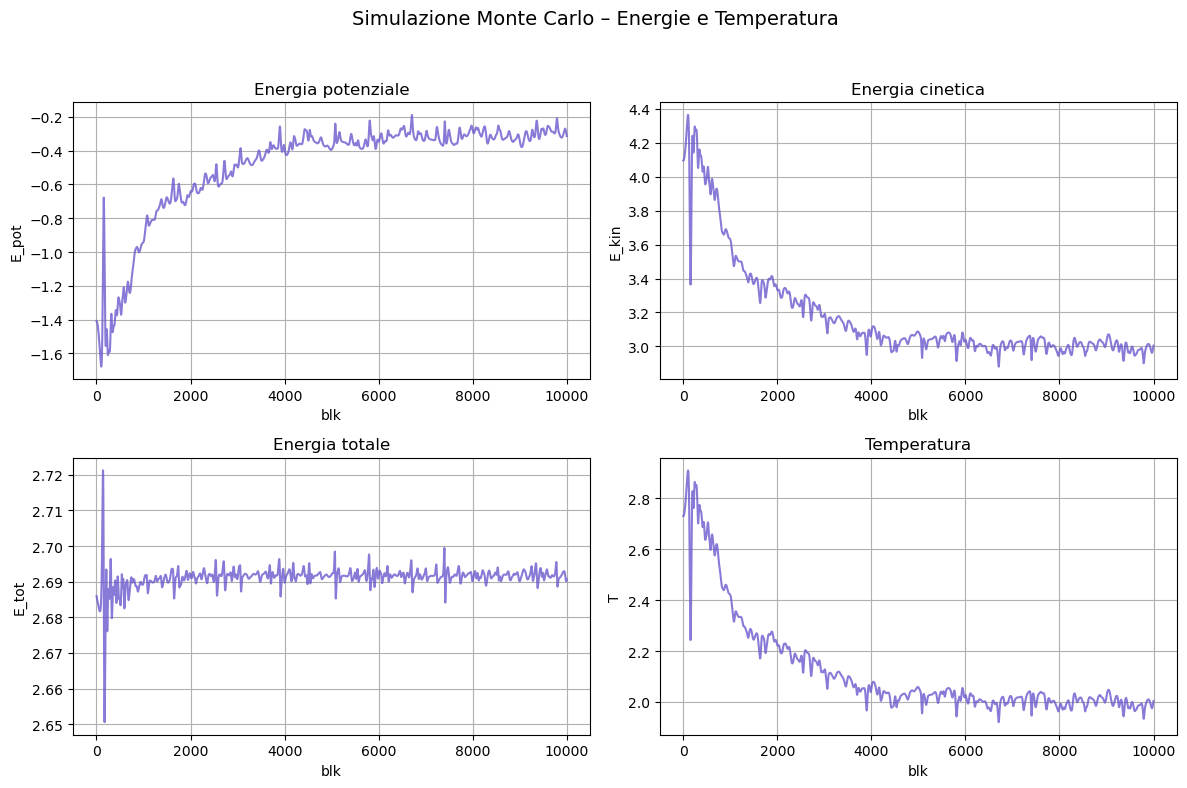

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#============  Funzione per caricare i dati  ============#
def load_data(path):
    data = np.loadtxt(path)
    blk   = data[:,0].astype(int)
    avg   = data[:,1]
    return blk, avg

#============  Funzione per plottare  ============#
def plot2(ax, blk, avg, ylabel, title):
    ax.plot(blk, avg, '-', color='slateblue', alpha=0.8, markersize=4)
    ax.set_xlabel("blk")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)

#============  Caricamento dati  ============#
blk_p, avg_p = load_data("NSL_SIMULATOR/OUTPUT/potential_energy_terma.dat")
blk_k, avg_k = load_data("NSL_SIMULATOR/OUTPUT/kinetic_energy_terma.dat")
blk_t, avg_t = load_data("NSL_SIMULATOR/OUTPUT/total_energy_terma.dat")
blk_temp, avg_temp = load_data("NSL_SIMULATOR/OUTPUT/temperature_terma.dat")

#============  Plot 4 subplot  ============#
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle("Simulazione Monte Carlo – Energie e Temperatura", fontsize=14)

plot2(axs[0,0], blk_p, avg_p, "E_pot", "Energia potenziale")
plot2(axs[0,1], blk_k, avg_k, "E_kin", "Energia cinetica")
plot2(axs[1,0], blk_t, avg_t, "E_tot", "Energia totale")
plot2(axs[1,1], blk_temp, avg_temp, "T", "Temperatura")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

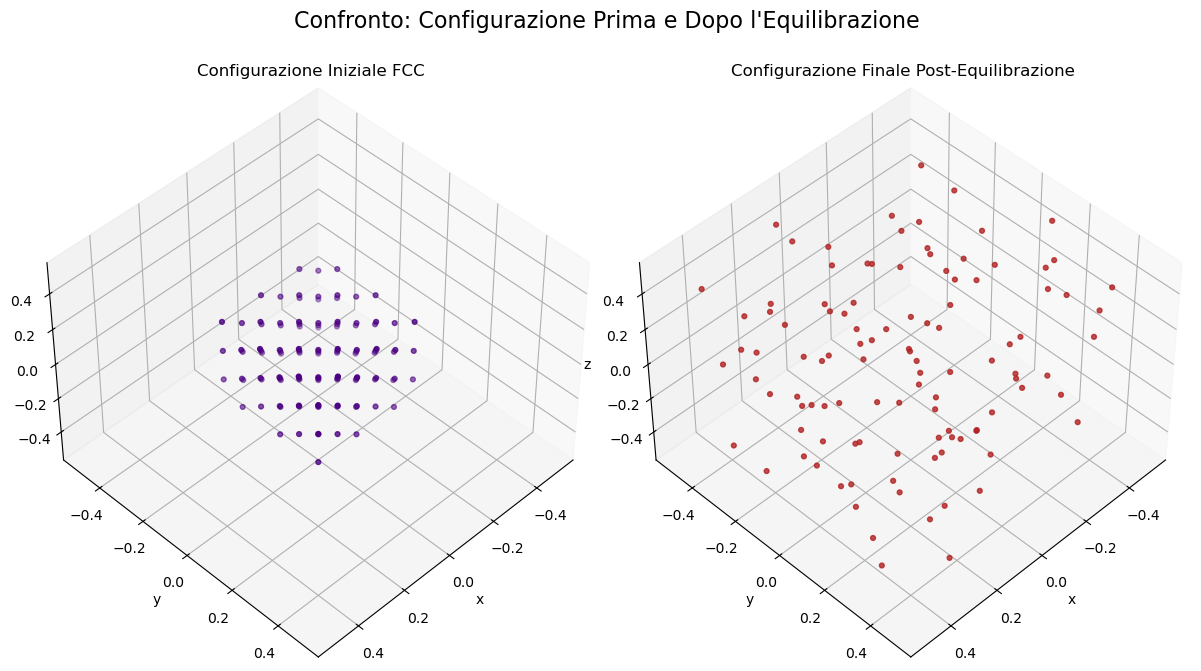

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ================= CARICAMENTO DATI ==================

# 1. Caricamento della configurazione iniziale FCC
try:
    data_fcc = np.genfromtxt("NSL_SIMULATOR/INPUT/CONFIG/config.fcc", skip_header=2, usecols=(1,2,3))
    x_fcc, y_fcc, z_fcc = data_fcc.T
except FileNotFoundError:
    print("ATTENZIONE: File 'config.fcc' non trovato.")
    data_fcc = np.array([[]])
    x_fcc, y_fcc, z_fcc = np.array([]), np.array([]), np.array([])

# 2. Caricamento della configurazione finale (Post-Termalizzazione)
try:
    # Ho corretto il path da config_backward.xyz a config_postterma.xyz (come nel tuo codice)
    data_back = np.genfromtxt("NSL_SIMULATOR/INPUT/CONFIG/config_postterma.xyz", skip_header=2, usecols=(1,2,3))
    x_back, y_back, z_back = data_back.T
except FileNotFoundError:
    print("ATTENZIONE: File 'config_postterma.xyz' non trovato.")
    data_back = np.array([[]])
    x_back, y_back, z_back = np.array([]), np.array([]), np.array([])

# ================= CALCOLO LIMITI COMUNI ==================

scale_factor = 0.5
global_min = -1.0 # Valori di default
global_max = 1.0

if data_fcc.size > 0 or data_back.size > 0:
    # 1. Scaliamo i dati FCC
    scaled_fcc_coords = data_fcc * scale_factor if data_fcc.size > 0 else np.empty((0,3))
    
    # 2. Combiniamo tutti i dati in un'unica matrice
    all_coords = np.concatenate([scaled_fcc_coords, data_back], axis=0) if data_back.size > 0 else scaled_fcc_coords
    
    if all_coords.size > 0:
        # 3. Troviamo il min e max globale su tutte le dimensioni (x, y, z)
        min_val = all_coords.min()
        max_val = all_coords.max()
        
        # 4. Aggiungiamo un piccolo buffer (5% del range totale)
        lim_range = max_val - min_val
        lim_buffer = lim_range * 0.05
        global_min = min_val - lim_buffer
        global_max = max_val + lim_buffer


# ================= PLOT AFFIANCATI ==================

fig = plt.figure(figsize=(12, 8))

plt.suptitle("Confronto: Configurazione Prima e Dopo l'Equilibrazione", fontsize=16)

view_elev = 45 # Angolo di elevazione comune
view_azim = 45 # Angolo azimutale comune

# --- Grafico 1: Configurazione Iniziale FCC ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d') # 1 riga, 2 colonne, Grafico 1

if x_fcc.size > 0:
    # Applichiamo il fattore di scala:
    ax1.scatter(scale_factor * x_fcc,
                scale_factor * y_fcc,
                scale_factor * z_fcc,
                color='indigo',
                s=12)

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

ax1.set_title("Configurazione Iniziale FCC") 
ax1.view_init(elev=view_elev, azim=view_azim)

ax1.set_xlim(global_min, global_max) 
ax1.set_ylim(global_min, global_max) 
ax1.set_zlim(global_min, global_max) 


# --- Grafico 2: Configurazione Finale Post-Termalizzazione ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d') # 1 riga, 2 colonne, Grafico 2

if x_back.size > 0:
    # NON applichiamo il fattore di scala:
    ax2.scatter(x_back,
                y_back,
                z_back,
                color='firebrick',
                marker='o',
                s=12,
                alpha=0.8)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

ax2.set_title("Configurazione Finale Post-Equilibrazione") 
ax2.view_init(elev=view_elev, azim=view_azim)

ax2.set_xlim(global_min, global_max) 
ax2.set_ylim(global_min, global_max) 
ax2.set_zlim(global_min, global_max) 


plt.tight_layout(rect=[0,0,1.,1.1])
plt.show()

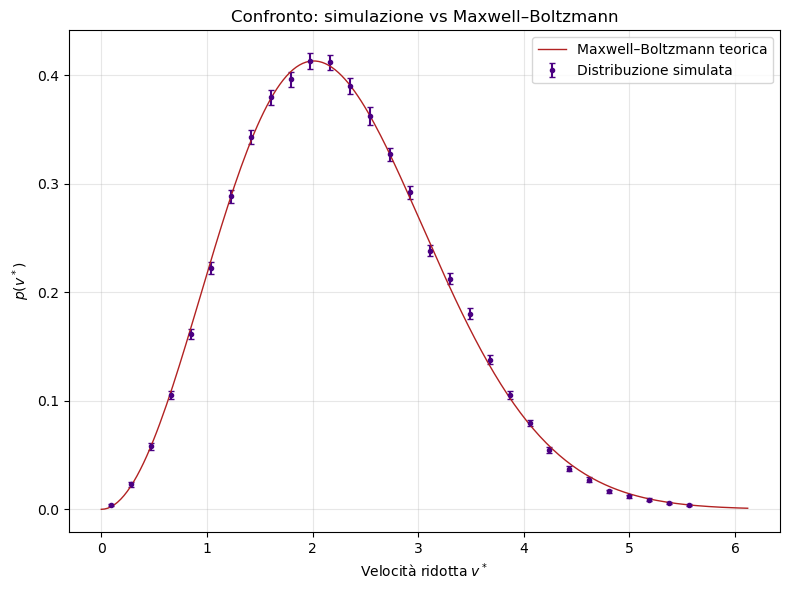

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# --- Carico i dati dal file ---
data = np.loadtxt("NSL_SIMULATOR/OUTPUT/pofv_es2.dat")

blk   = data[:,0]   # numero del blocco
v_bin = data[:,1]   # velocità (ascissa)
ave   = data[:,2]   # media del blocco (istantanea)
cum   = data[:,3]   # media cumulativa
err   = data[:,4]   # errore cumulativo

# --- Prendo solo l’ultimo blocco (distribuzione stabilizzata) ---
mask = (blk == np.max(blk))
v_data = v_bin[mask]
pofv_data = cum[mask]
err_data = err[mask]

# --- Parametri teorici ---
T_star = 2.02

# Distribuzione teorica di Maxwell-Boltzmann
def maxwell_boltzmann(v, T):
    return (1.0 / ( (2*np.pi*T)**1.5 )) * (4*np.pi) * v**2 * np.exp(-v**2 / (2*T))

v_theory = np.linspace(0, np.max(v_data)*1.1, 200)
p_theory = maxwell_boltzmann(v_theory, T_star)

# --- Grafico ---
plt.figure(figsize=(8,6))

# Distribuzione simulata (con barre d'errore)
plt.errorbar(v_data, pofv_data, yerr=err_data, fmt='.', color='indigo capsize=2,
             label="Distribuzione simulata")

# Distribuzione teorica (curva liscia)
plt.plot(v_theory, p_theory, color='firebrick', lw=1, label="Maxwell–Boltzmann teorica")

plt.xlabel("Velocità ridotta $v^*$")
plt.ylabel("$p(v^*)$")
plt.title("Confronto: simulazione vs Maxwell–Boltzmann")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Come spiegato sopra, l'algoritmo di Verlet è reversibile. Infatti si osserva che per trovare le posizioni a tempi precedenti bisogna semplicemente considerare:
$$\vec{r}(t+\delta t) = 2\vec{r}(t)-\vec{r}(t-\delta t)+\delta t^2 \vec{a}(t)$$
$$\vec{r}(t-\delta t) = 2\vec{r}(t)-\vec{r}(t+\delta t)+\delta t^2 \vec{a}(t)$$
Per mostrarlo si introduce in `system.cpp` un nuovo metodo: `ReverseVerlet()`, che implementa l'inversione del tempo per lo schema di integrazione di Verlet, permettendo di far "tornare indietro" le particelle rispetto allo step corrente. 
Per ciascuna particella si leggono:
- le posizioni correnti salvate in `conf.xyz` 
- le posizioni allo step precedente salvate in `conf-1.xyz` 

Le posizioni correnti vengono assegnate alla particella e si accetta la mossa tramite `_particle(i).acceptmove()`. In questo modo le posizioni correnti diventano le posizioni vecchie. Le posizioni vecchie vengono poi impostate come correnti, preparando il sistema per il passo indietro nella simulazione. Come ultima cosa si calcolano le velocità iniziali per tornare indietro sono calcolate come: $v = \frac{r_{old} - r_{att}}{2 \Delta t}$ applicando pbc. Questo assicura che la simulazione possa essere integrata all’indietro nello stesso modo in cui è stata eseguita in avanti. Dopo questo la simulazione procede facendo dei normali step Verlet.



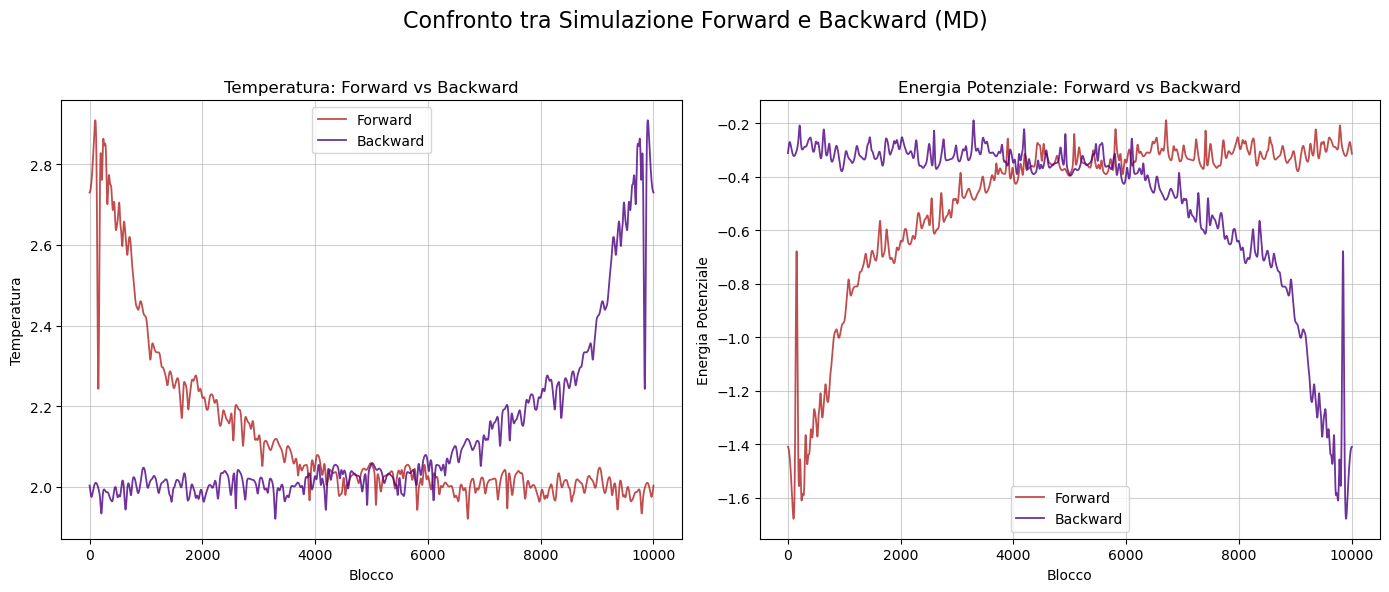

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# ============ Funzione per caricare i dati ============#
def load_data(path):
    # Utilizziamo skiprows=1 per saltare l'intestazione standard dei file di output
    try:
        data = np.loadtxt(path, skiprows=1)
    except FileNotFoundError:
        print(f"ATTENZIONE: File non trovato a {path}. Assicurati che il percorso sia corretto.")
        return np.array([]), np.array([])
    except Exception as e:
        print(f"Errore nel caricamento del file {path}: {e}")
        return np.array([]), np.array([])

    if data.ndim == 1:
        data = data.reshape(1, -1)
    
    if data.size == 0:
        return np.array([]), np.array([])

    blk = data[:,0].astype(int)
    # Colonna 1: Valore ATTUALE/INSTANTANEO (ACTUAL_PROP)
    # Colonna 2: Valore MEDIO DI BLOCCO (PROP_AVE)
    # Uso la colonna 1 (indice 1) come nel tuo codice iniziale.
    avg = data[:,1] 
    return blk, avg

# ============ Funzione per plottare confronto ============#
def plot_comparison(ax, blk_f, avg_f, label_f, color_f, blk_b, avg_b, label_b, color_b, ylabel, title):
    if blk_f.size > 0:
        ax.plot(blk_f, avg_f, '-', color=color_f, label=label_f, alpha=0.8, linewidth=1.3)
    if blk_b.size > 0:
        ax.plot(blk_b, avg_b, '-', color=color_b, label=label_b, alpha=0.8, linewidth=1.3)
    
    if blk_f.size > 0 or blk_b.size > 0:
        ax.set_xlabel("Blocco")
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend(loc='best')
        ax.grid(True, linestyle='-', alpha=0.6)
    else:
        ax.text(0.5, 0.5, "Dati non disponibili", ha='center', va='center', transform=ax.transAxes)


# ============ Caricamento dati ============#
# Temperature Forward (Termalization)
temp_f_blk, temp_f_avg = load_data("NSL_SIMULATOR/OUTPUT/temperature_terma.dat")
# Potential Energy Forward
epot_f_blk, epot_f_avg = load_data("NSL_SIMULATOR/OUTPUT/potential_energy_terma.dat")
# Temperature Backward
temp_b_blk, temp_b_avg = load_data("NSL_SIMULATOR/OUTPUT/temperature_backward.dat")
# Potential Energy Backward
epot_b_blk, epot_b_avg = load_data("NSL_SIMULATOR/OUTPUT/potential_energy_backward.dat")

# ============ Plot Confronto ============#
# Creiamo una figura con 1 riga e 2 colonne
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle("Confronto tra Simulazione Forward e Backward (MD)", fontsize=16)

# --- Grafico 1: Temperatura ---
plot_comparison(
    axs[0],
    temp_f_blk, temp_f_avg, "Forward", "firebrick",
    temp_b_blk, temp_b_avg, "Backward", "indigo",
    "Temperatura",
    "Temperatura: Forward vs Backward"
)

# --- Grafico 2: Energia Potenziale ---
plot_comparison(
    axs[1],
    epot_f_blk, epot_f_avg, "Forward", "firebrick",
    epot_b_blk, epot_b_avg, "Backward", "indigo",
    "Energia Potenziale",
    "Energia Potenziale: Forward vs Backward"
)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

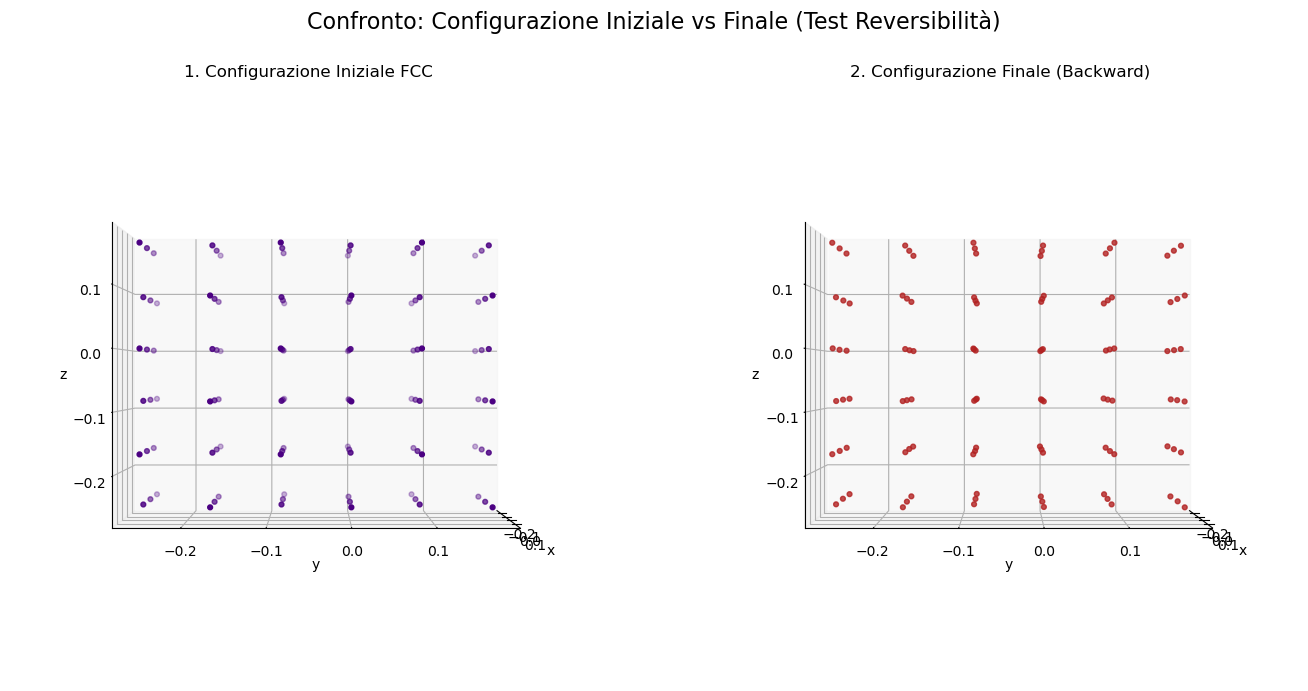

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# ================= CARICAMENTO DATI (come prima) ==================

# 1. Caricamento della configurazione iniziale FCC
try:
    data_fcc = np.genfromtxt("NSL_SIMULATOR/INPUT/CONFIG/config.fcc", skip_header=2, usecols=(1,2,3))
    x_fcc, y_fcc, z_fcc = data_fcc.T
except FileNotFoundError:
    print("ATTENZIONE: File 'config.fcc' non trovato.")
    x_fcc, y_fcc, z_fcc = np.array([]), np.array([]), np.array([])

# 2. Caricamento della configurazione finale (backward)
try:
    data_back = np.genfromtxt("NSL_SIMULATOR/OUTPUT/CONFIG/config_backward.xyz", skip_header=2, usecols=(1,2,3))
    x_back, y_back, z_back = data_back.T
except FileNotFoundError:
    print("ATTENZIONE: File 'config_backward.xyz' non trovato.")
    x_back, y_back, z_back = np.array([]), np.array([]), np.array([])


# ================= PLOT AFFIANCATI ==================

# Creiamo una figura con 1 riga e 2 colonne per i due grafici 3D
fig = plt.figure(figsize=(14, 7))
plt.suptitle("Confronto: Configurazione Iniziale vs Finale (Test Reversibilità)", fontsize=16)

scale_factor = 0.5 
view_elev = 0 # Angolo di elevazione comune
view_azim = 0 # Angolo azimutale comune

# --- Grafico 1: Configurazione Iniziale FCC ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d') # 1 riga, 2 colonne, Grafico 1

if x_fcc.size > 0:
    # Applichiamo il fattore di scala solo qui, come richiesto:
    ax1.scatter(scale_factor * x_fcc, 
                scale_factor * y_fcc, 
                scale_factor * z_fcc, 
                color='indigo', 
                s=12)

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.set_title("1. Configurazione Iniziale FCC")
ax1.view_init(elev=view_elev, azim=view_azim)



# --- Grafico 2: Configurazione Finale Backward ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d') # 1 riga, 2 colonne, Grafico 2

if x_back.size > 0:
    # NON applichiamo il fattore di scala qui, come richiesto:
    ax2.scatter(x_back, 
                y_back, 
                z_back, 
                color='firebrick', 
                marker='o', 
                s=12, 
                alpha=0.8)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_title("2. Configurazione Finale (Backward)")
ax2.view_init(elev=view_elev, azim=view_azim)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()